### Necessary Imports

In [34]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt


### Reading Data

In [36]:
# Read the dataset
def load_data():
    data = np.genfromtxt('price-prediction.csv', delimiter=',', skip_header=1)
    x = data[:, 0]
    y = data[:, 1]
    # Normalize the data
    x = (x - np.mean(x)) / np.std(x)
    return np.column_stack((x, y))

data = load_data()


### Visualize Datapoints in Data

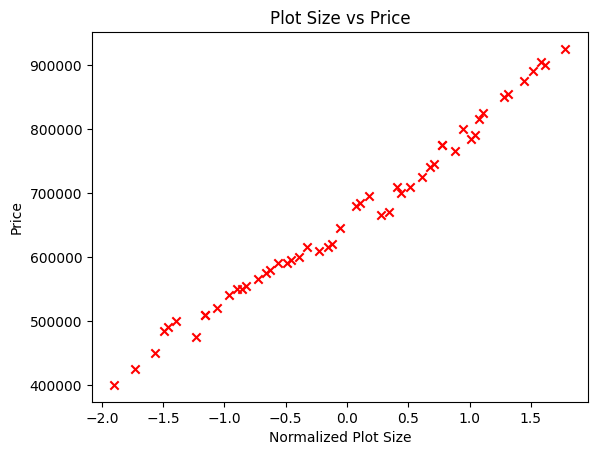

In [37]:
# Plot the dataset
plt.scatter(data[:, 0], data[:, 1], color='red', marker='x')
plt.xlabel('Normalized Plot Size')
plt.ylabel('Price')
plt.title('Plot Size vs Price')
plt.show()

### Some Base Functions

In [38]:
def plot_data(m, b, data):
    # Plot the data points as a scatter plot
    plt.scatter(data[:, 0], data[:, 1], color='blue')

    # Find min and max values in the data
    x_min, x_max = np.min(data[:, 0]), np.max(data[:, 0])
    x = np.array([x_min, x_max])

    # Plot the line defined by y = m * x + b
    y = m * x + b

    # Set the labels for the x and y axes
    plt.plot(x, y, color='red', label='Regression line')
    plt.xlabel('Normalized Plot Size')
    plt.ylabel('Price')
    plt.legend()

    # Set the title for the plot
    plt.title('Price Prediction')

    # Display the plot
    plt.show()


In [39]:
def loss_function(m, c, points):
    # Initialize the total error to 0
    total_error = 0

    # Loop through all the points in the dataset
    for point in points:
        # Get the 'x' and 'y' values of the current 'point'
        x = point[0]
        y = point[1]

        # Calculate the error for this point and add it to the total error
        total_error += (y - (m * x + c)) ** 2

    # Return the average error for all points
    return total_error / len(points)
    

In [40]:
# Formula of slope: -1/N * x * (y - (m * x + b))
# Formula of y_intercept: -1/N * (y - (m * x + b))

def gradient_descent(current_m, current_b, points, lr):
    # Initialize the gradients for m and b to 0
    m_gradient = 0
    b_gradient = 0

    # Get the number of points in the dataset
    N = len(points)

    # Loop through all the points in the dataset
    for i in range(N):
        # Get the 'x' and 'y' values of the current 'point'
        x = points[i, 0]
        y = points[i, 1]

        # Calculate the partial derivatives of the loss function with respect to m and b
        m_gradient += (-1/N) * x * (y - (current_m * x + current_b))
        b_gradient += (-1/N) * (y - (current_m * x + current_b))

    # Update 'm' and 'b' using gradient descent
    updated_m = current_m - (lr * m_gradient)
    updated_b = current_b - (lr * b_gradient)

    # Return the updated values of m and b
    return updated_m, updated_b

### Running Script

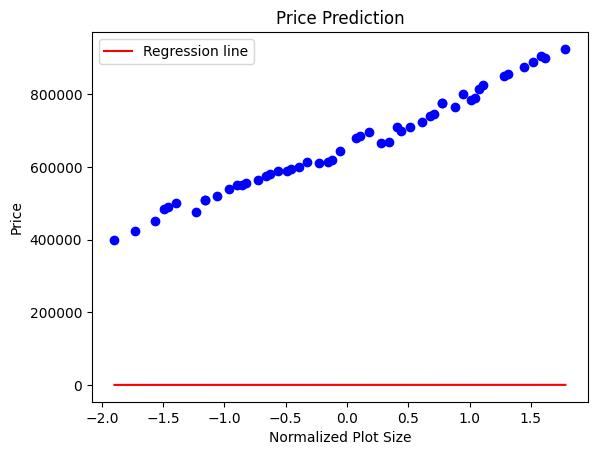

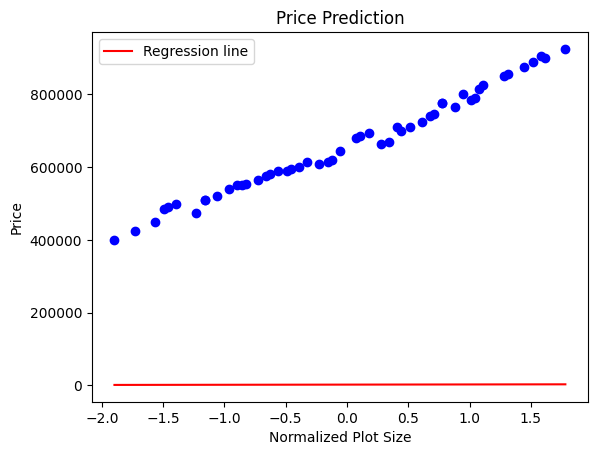

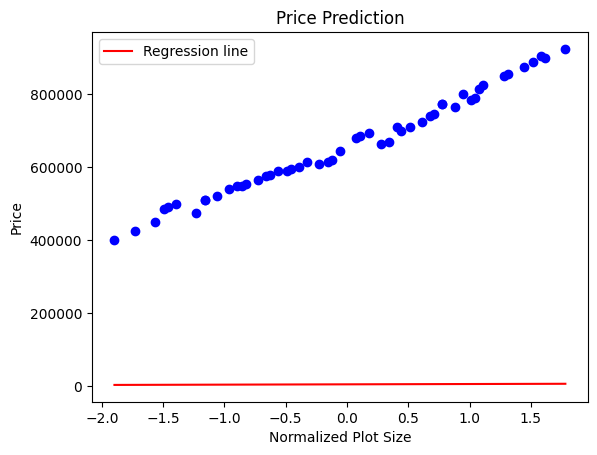

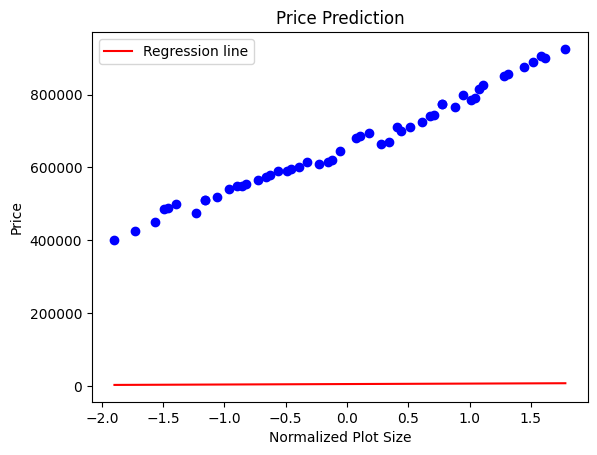

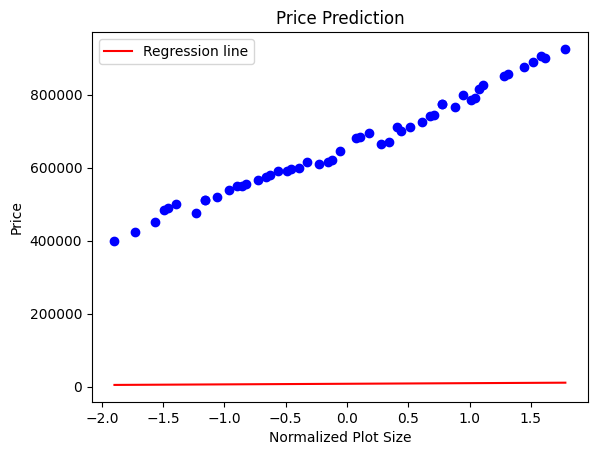

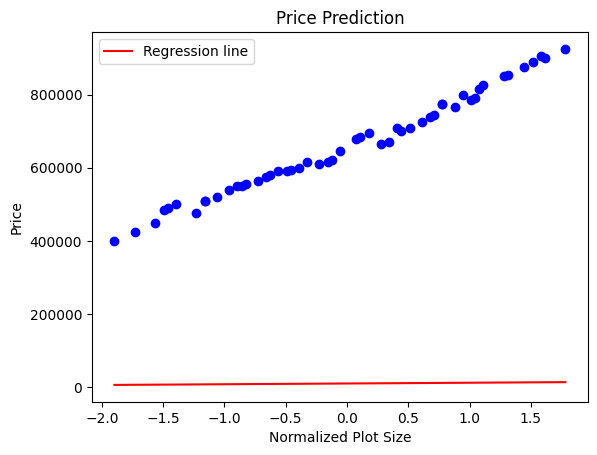

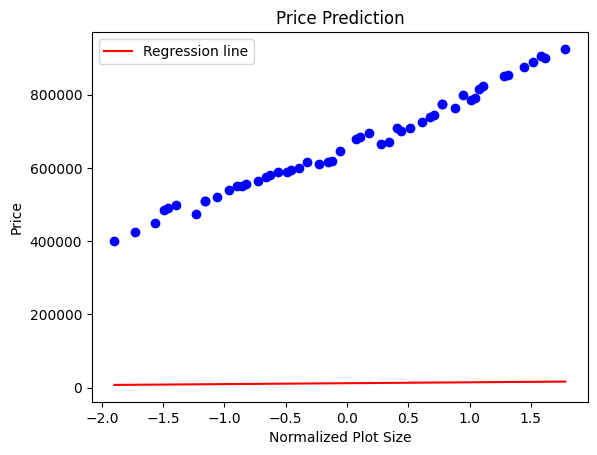

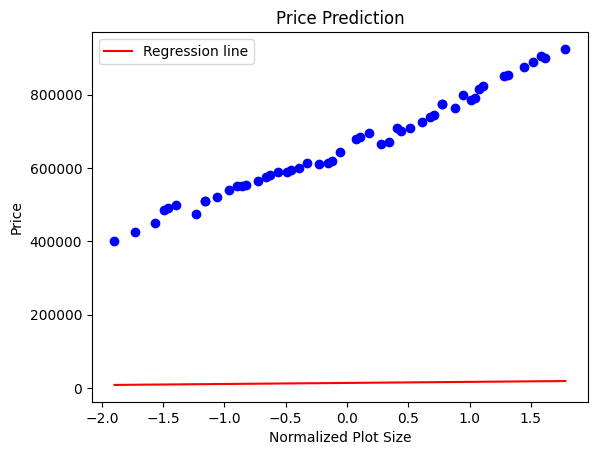

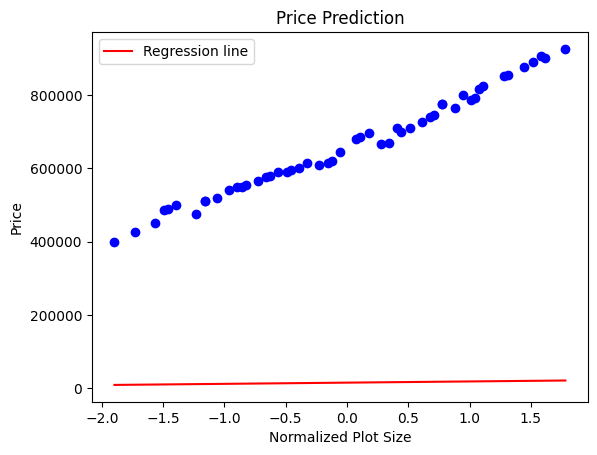

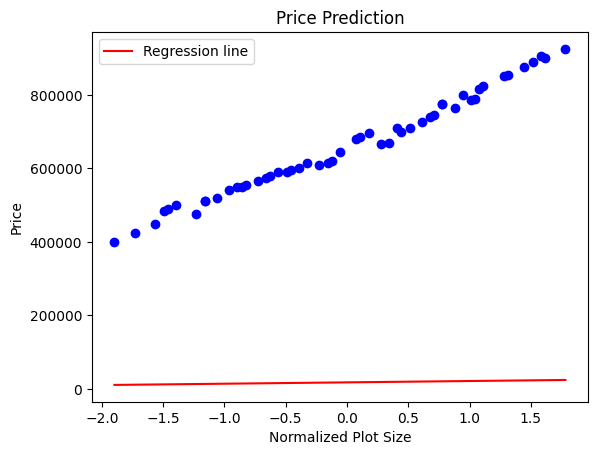

Final values of m and b: 4025.41110293264 19562.83236785248


In [61]:
# Initialize the values of m and b to 0
m = 0
b = 0

# Set the learning rate and number of epochs for gradient descent
lr = 0.0003
epochs = 100

# Perform gradient descent for the specified number of epochs
for i in range(epochs):
    # Update m and b using gradient descent
    m, b = gradient_descent(m, b, data, lr)

    # Plot the current data every 10 epochs
    if i % 10 == 0:
        plot_data(m, b, data)

# Print the final values of m and b
print('Final values of m and b:', m, b)

### Predicting New Data

In [62]:
# Read a datapoint as 'x' from the user
x = float(input('Enter the size of plot: '))

# Normalize the input
x = (x - np.mean(data[:, 0])) / np.std(data[:, 0])

# Does a prediction by calculating mx+b
prediction = m * x + b

# Print the prediction
print(f'Price for {x} size of plot should be around $:{prediction}')

Price for 100.00000000000001 size of plot should be around $:422103.94266111654


<hr>

Error we checked for 100 = 28,897

so we are pretty accurate by adjusting lr and epoches